    Instructor(s): Dr. Kenneth Duru
    First Semester 2019
    Mathematical Sciences Institute
    Australian National University
    
# Math3511/6111, Scientific Computing

This Lab book must be submitted by **3rd June 5pm**. Late Submissions will
incur a 5% penalty per working day. Assignment submissions will close on the **10th June 5pm**. Submissions after this time will be invalid.



# Lab 5: ODEs

In [1]:
%matplotlib inline
import numpy as np

This tutorial is designed to familiarise you with solving ordinary differential equations using the Python procedure ode.

## A. Scalar Ordinary Differential Equations (ODE's)

Suppose we want to find the solution $u(t)$ of the ordinary differential equation

\begin{equation}
\frac{du}{dt} = k u(t)(1-u(t)), \quad t\geq 0.
\end{equation}

This equation is a simple model for the spread of disease. Consider a herd of $P$ animals, and let $u(t)$ be the proportion of animals infected by the disease after $t$ days. Thus $1-u(t)$ is the proportion of uninfected animals. New infections occur when infected and unifected animals meet. The number of such meetings is proportional to $u(t)(1-u(t))$. Thus a simple model for the spread of the disease is that the new infections per day, $du/dt$, is proportional to $u(t)(1-u(t))$. That is, we obtain Equation (1) where the constant $k$ depends on the density of the animals and infecetiousness of the disease. As a specific example, suppose here $P=10000$ animals and $k=0.2$. Initially at time $t=0$ there is just one infectious animal, and so we add the initial condition

$$
u(0) = 1/10000
$$

We want to find how many individuals will be infected over the next $100$ days, that is to plot $u(t)$
from $t = 0$ to $t = 100$. To solve this problem we need to define a function to calculate the right
hand side of (1), and then use the Python program ode.  
Create a Python function which specifies the right hand side of the differential equation.
Make sure you get the calling sequence correct. For instance

In [2]:
def f(y,t,k):
    return k*y*(1-y)

(Although t is not used in calculating the result, the Python function odeint requires the function
f must have at least two input arguments (in the correct order). Use help odeint for more
information.)
Having set up the problem, the differential equation is solved as follows:

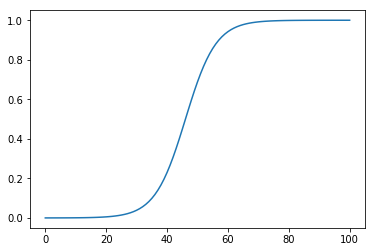

In [3]:
from scipy.integrate import odeint
from scipy import arange
import numpy as ap
import matplotlib.pyplot as plt

#define the domain

xs = arange(0,101)

#solve the ODE

ys = odeint(f,1/10000,xs,args=(0.2,)) 
#Note: for args=(0.2,), the comma is required

#plot the solution

plt.plot(xs,ys[:,0])
plt.show()

The function odeint also has parameters which can be adjusted to control the accuracy of the
computation. It is always a good idea to check the original solution by resolving the problem with
higher accuracy requirements. For example, we can use odeint so that the estimated absolute and
relative errors are kept less than $1 \times 10^{-9}$
. This is done with the command

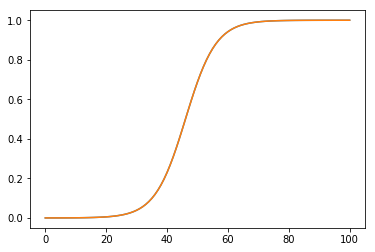

In [4]:
# solve the ODE to a higher degree of accuracy

ys2 = odeint(f,1/10000,xs,args=(0.2,),rtol=1e-9,atol=1e-9)

#plot the two solutions

plt.plot(xs,ys[:,0])
plt.plot(xs,ys2[:,0])
plt.show()

We immediately see that the solution computed in the first call to odeint lies on top of the
more accurate solution curve. That is the two solutions coincide to graphical accuracy.
For this simple model it is possible to find an analytic formula for $u(t)$. In fact

$$
u(t) = \frac{1}{1+c\exp(-kt)} \quad \text{where} \quad c=P-1.
$$

We can add this formula to the above graph as a final check.

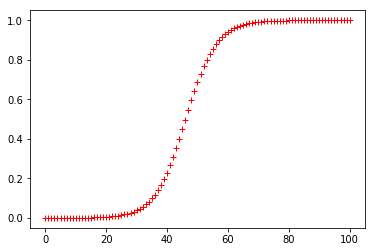

In [5]:
from scipy import arange, exp

c=10000-1
k=0.2

#define the exact solution

def exactu(t):
    return 1/(1+c*exp(-k*t))

#plot the exact solution

plt.plot(xs, exactu(xs),'r+')
plt.show()

The exact formula gives a curve that is the same as the numerical solution. In fact the
difference between the exact solution and ys is at most $5.54\times 10^{-5}$ and the difference between theexact solution and ys2 is at most $3.52\times 10^{-6}$. So we can be confident in using odeint to solve the problems below.

### A1. Exercise 1. [50pts]

1) Check that the analytic formula given for $u(t)$ above is a solution to the ODE given at the start and that it satisfies the Initial condition of $u(0)$. Do this by hand.

2) From the graph of $u(t)$, estimate how many days are needed for half the population to be infected.  Hint: You can inspect the plot to get a solution up to the closest day. The command `plt.grid(on)` will make this easier to answer. To narrow the range of the plots you may want to look up the `xlim` and `ylim` plotting commands. 

3) Suppose now that after the infection is noted at day $t = 0$, an inoculation program is started from day 5, and 200 of the uninfected animals are inoculated per day. After $t$ days, the proportion of animals inoculated per day is $200(t - 5)_{+}/10000$. Here $(t - 5)_{+}$ means $\max(t - 5, 0)$. These inoculated animals cannot be infected, an new infections occur when an uninfected, un-inoculated animal meets an infected animal. Thus the rate of increase of u is now modelled by the differential equation $$\frac{du}{dt} = ku(t)(1-u(t)-0.02(1-t)_{+})_{+} ;$$ Now, how many animals are uninfected after 100 days with the inoculation program?

4) How many Animals would be uninfected if only 100 animals could be inoculated each day from day 5?

5) How many animals would have been saved if 100 animals per day were inoculated from day 0?

  This simple model problem also has a formula for the exact solution. However in Python it is fairly easy to get a numerical solution; and this can be done even in complicated problems when there is no simple formulae for the solution. Using Python we can simply explore the model by altering the parameters and plotting the solutions!

# Solutions

1)

The ODE and initial condition are: 
\begin{equation}
\frac{du}{dt} = k u(t)(1-u(t)), \quad t\geq 0.
\end{equation}

and $u(0)=1/P=1/10000$ where $P=10000$

The analytical solution is given by:
$$
u(t) = \frac{1}{1+c\exp(-kt)} \quad \text{where} \quad c=P-1.
$$

By calculation:
$$LHS=\frac{du}{dt}=\frac{kc\exp(-kt)}{(1+c\exp(-kt))^2}$$

$$RHS=ku(t)(1-u(t))=k \frac{1}{(1+c\exp(-kt))} \frac{c\exp(-kt)}{(1+c\exp(-kt))}=\frac{kc\exp(-kt)}{(1+c\exp(-kt))^2}$$
Hence, $$LHS=RHS$$
the analytic formula given for u(t) is a solution to the ODE, it also satisfy the boundary condition:
$$u(0)=\frac{1}{1+c}=\frac{1}{P}=\frac{1}{10000}$$

2)

From the plot below, we inspect the plot to get that 46 days are needed for half the population to be infected.

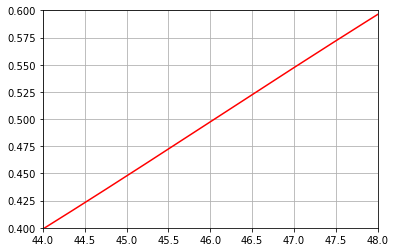

In [6]:
x = np.linspace(0,101,10000)
plt.plot(x, exactu(x),'r')
plt.xlim(44, 48) 
plt.ylim(0.4, 0.6) 
plt.grid()
plt.show()

3)

The modified differential equation is 
$$\frac{du}{dt} = ku(t)(1-u(t)-0.02(t-5)_{+})_{+} ;$$ where$$ (t-5)_+=max(t-5,0)$$

We solve this ODE by the following code, plot it and calculate the number of animals uninfected after 100 days with the inoculation program.And we can see that 9650 animals are uninfected after 100 days with the inoculation program.

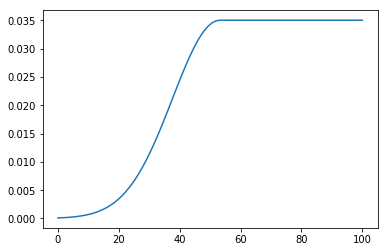

In [7]:
def g(y,t,k):
    return k*y*max(1-y-0.02*max(t-5,0),0)


x = arange(0,101)

#solve the ODE

y = odeint(g,1/10000,xs,args=(0.2,)) 
#Note: for args=(0.2,), the comma is required

#plot the solution

plt.plot(x,y[:,0])
plt.show()

In [8]:
#calculate the number of animals uninfected after 100 days
10000*(1-y[100])

array([9650.01979793])

4)

if only 100 animals could be inoculated each day from day 5. After $t$ days, the proportion of animals inoculated per day is $100(t - 5)_{+}/10000$, where $(t - 5)_{+}= \max(t - 5, 0)$. From similar derivation we can get that the ODE describing u(t) will be modified as $$\frac{du}{dt} = ku(t)(1-u(t)-0.01(t-5)_{+})_{+} ;$$ 


We solve this ODE by the following code, plot it and calculate the number of animals uninfected after 100 days with the inoculation program.And we can see that 6441 animals are uninfected after 100 days with the inoculation program.

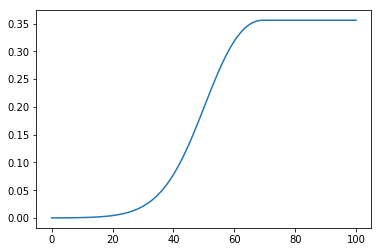

In [9]:
def g(y,t,k):
    return k*y*max(1-y-0.01*max(t-5,0),0)


x = arange(0,101)

#solve the ODE

y = odeint(g,1/10000,xs,args=(0.2,)) 
#Note: for args=(0.2,), the comma is required

#plot the solution

plt.plot(x,y[:,0])
plt.show()

In [10]:
#calculate the number of animals uninfected after 100 days
10000*(1-y[100])

array([6441.12430207])

5)

if only 100 animals could be inoculated each day from day 0. After $t$ days, the proportion of animals inoculated per day is $100(t)_{+}/10000$, where $(t)_{+}= \max(t, 0)$.  From similar derivation we can get that the ODE describing u(t) will be modified as $$\frac{du}{dt} = ku(t)(1-u(t)-0.01(t)_{+})_{+} ;$$

We solve this ODE by the following code, plot it and show its asymptotically constant value.

We solve this ODE by the following code, plot it and calculate the number of animals uninfected after 100 days with the inoculation program. And we can see that 7205 animals are uninfected after 100 days with the inoculation program.

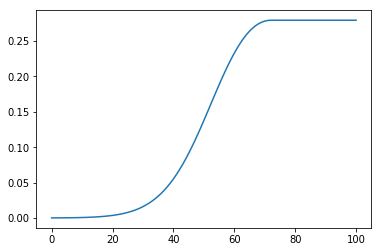

In [11]:
def g(y,t,k):
    return k*y*max(1-y-0.01*max(t,0),0)


x = arange(0,101)

#solve the ODE

y = odeint(g,1/10000,xs,args=(0.2,)) 
#Note: for args=(0.2,), the comma is required

#plot the solution

plt.plot(x,y[:,0])
plt.show()

In [12]:
#calculate the number of animals uninfected after 100 days
10000*(1-y[100])

array([7205.28750814])

## B. Chemical Reaction Systems

Many interesting ODE's can be constructed to describe the evolution of chemical reactions. Suppose we have 4 chemicals species, $A,B,C$ and $D$. These might denote $O_{2}, H_{2}, OH, H_{2}O$ etc. 

### B1. Law of Mass Action

The Law of Mass Action in chemical kinetics stated that the rate at which a chemical is produces is proportional to the product of the reactants. So, for example, if

$$
A+B \rightarrow^{k} C
$$

then

$$
\frac{d[C]}{dt} = k [A][B].
$$

The square brackets denote the concentrations of the  chemical species. For a more general reaction, such as, 

$$
A+mB \rightarrow^{k} nB+pC,
$$

the Law of Mass Action says the following differential equations describe the chemical kinetics:

\begin{align*}
\frac{d[A]}{dt} & = -k[A][B]^{m}, \\
\frac{d[B]}{dt} & = (n-m)k[A][B]^{m}, \\
\frac{d[C]}{dt} & = pk[A][B]^{m}.
\end{align*}

### B2. Python Example

Lets now lookat a specific example. Suppose we can write one reaction between four species via a chemical equation

$$
A+B \rightarrow^{k_{1}} C+D.
$$

This reaction will not take place instantaneously, but will react at a rate proportional to the concentration of the reactants $A$ and $B$ with a rate constant $k_{1}$. Suppose we have a second equation

$$
A+A+C \rightarrow^{k_{2}} B,
$$

and we suppose these two reaction equations fully specify the reactions taking place in our system.  We can generate the evolution equations for the concentrations of chemical species as follows

\begin{align*}
\frac{d[A]}{dt} &= -k_{1}[A][B] - 2k_{2}[A][A][C] \\
\frac{d[B]}{dt} &= -k_{1}[A][B] + k_{2}[A][A][C] \\
\frac{d[C]}{dt} &= k_{1}[A][B] - k_{2}[A][A][C] \\
\frac{d[D]}{dt} &= k_{1}[A][B]
\end{align*}

where the square brackets denote concentrations.  
To understand how these equations are developed, lets first look at the equation

$$
\frac{d[A]}{dt} = -k_{1}[A][B] - 2k_{2}[A][A][C]
$$

The rate of the first reaction ($A+B \rightarrow^{k_{1}} C+D.$) will depend proportionally on $[A]$ and $[B]$, the constant of proportionality given by $k_{1}$. So the rate of the first reaction will be given by $k_{1}[A][B]$. Each instance of the first reaction will use up one unit of $A$. So the rate of change of concentration of $A$ due to the first reaction will be equal to $-k_{1}[A][B]$. The minus signifying one unit being used up. There are similar terms in the other ODE's corresponding to using up the species $B$ and creating the species $C$ and $D$.  

The rate of the second reaction will depend proportionally on $[A], [A]$ again, and $[C]$. So the rate of the second reaction ($A+A+C \rightarrow^{k_{2}} B$) will be $k_{2}[A][A][C]$. Each second reaction will use up 2 units of $A$, so the rate of change of concentration of $A$ due to the second reaction will be equal to $-2k_{1}[A][A][C]$.
The creation of the differential equations can be automated given the reaction equations and the corresponding rates. We leave it to the Chemists to give us a reasonable set of reaction equations with corresponding rates constants.

Now lets see how we can use Python to approximate the solution to this system of ODE’s.
We have 4 chemical species, so we will have a system of 4 equations. We will make the relationship
$x_{1} ← [A], x_{2} ← [B], x_{3} ← [C], x_{4} ← [D]$.  
In Python we would encode the associated ode as

In [13]:
from scipy import zeros
from scipy import linspace, array
from scipy.integrate import odeint

def chemical(x,t,k1,k2):
    f1 = k1*x[0]*x[1]
    f2 = k2*x[0]*x[0]*x[2]
    
    dx = zeros(4)
    dx[0] = -f1 -2*f2
    dx[1] = -f1 +  f2
    dx[2] =  f1 -  f2
    dx[3] =  f1
    return dx

(Be careful to get the $t$ and $x$ arguments in the correct order!)  
Setting up the rate constants and initial condition, we can obtain approximations to the solution at the times $t=0,0.001,0.002,\cdots,0.1$ using the code

In [14]:
k1 = 1e2
k2 = 1

t = linspace(0,0.1,100)
x0 = array([1,1,0,0]);

x = odeint(chemical, x0, t, args=(k1,k2));

It is nice to produce some graphical output. I used the following.

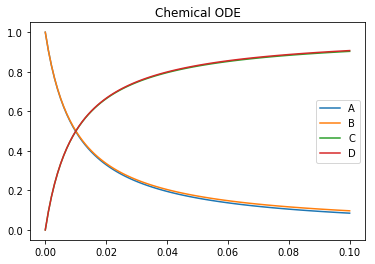

In [15]:
from matplotlib.pyplot import legend, title, plot, show

plt.plot(t,x[:,0],label='A')
plt.plot(t,x[:,1],label='B')
plt.plot(t,x[:,2],label='C')
plt.plot(t,x[:,3],label='D')
plt.legend()
plt.title("Chemical ODE")
plt.show()

### B3. Robertson's Example

An idealised chemical reaction system which is often used to generate a stiff system of ODE’s is given by the reaction equations

\begin{align*}
A & \rightarrow^{0.04} & B \\
B+B & \rightarrow^{3.0e7} & B+C \\
B+C & \rightarrow^{1.0e4} & A+C
\end{align*}

There are 3 chemical species and so there will be a corresponding system of 3 ODE’s modelling the evolution of the concentrations of these chemicals. The choice of rate constants tells us that the first reaction will evolve slowly, the second reaction very fast, and the final reaction fast.

### B4. Exercise 2 [50pts]

6) Derive the system of ODE's corresponding to Robertson's example.

7) Use Python to solve these equations with initial concentrations $[A] = 1, [B] = [C] = 0$ for $t \in [0, 0.001]$. Plot your results on the same graph using the command of the form 
```
from pylab import legend, plot, show
plot(t,y[:,0],label='A')
plot(t,y[:,1],label='B')
plot(t,y[:,2],label='C')
legend()
show()
```
The concentrations of $B$ and $C$ are very small compared to $A$. It is sensible to normalise
these concentrations by the maximum value of each concentration. We can use the `max` function, using the axis argument to produce an array containing the maximum of each column (see http://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.max.html). I.e
```
ymax = y.max(axis=0)
```
The trick is now to scale each row of y by the corresponding entries of ymax. I came up with 
```
yscaled = y/ymax;
```
Can you see what this is doing?  
Now you can plot $t$ versus `yscaled` with 
```
plot(t,yscaled[:,0],label='A')
plot(t,yscaled[:,1],label='B')
plot(t,yscaled[:,2],label='C')
legend()
show()
```
8) Interesting things happen for very small times as well as for much larger times. To see these things produce approximations of the concentrations at times $2^{i}, i = -20, ..., 10$. Plot the scaled three concentrations on the same plot using the previous scaled method. You should use a log scale for the time axis. Use the semilogx command.
```
semilogx(t,yscaled[:,0],label='A')
semilogx(t,yscaled[:,1],label='B')
semilogx(t,yscaled[:,2],label='C')
legend()
show()
```
9) The concentrations are still in a transient state at time t = 1024. Run the calculation to larger times to ascertain the long time behaviour of the system. What concentrations do $A$, $B$ and $C$ limit to?

# Solutions

6)

\begin{align*}
A & \rightarrow^{0.04} & B \\
B+B & \rightarrow^{3.0e7} & B+C \\
B+C & \rightarrow^{1.0e4} & A+C
\end{align*}

The rate of the first reaction ($A \rightarrow^{0.04} B.$) will depend proportionally on $[A]$, the constant of proportionality given by $k_1=0.04$. So the rate of the first reaction will be given by $k_{1}[A]$. 
Each instance of the first reaction will use up one unit of $A$. So the rate of change of concentration of $A$ due to the first reaction will be equal to $-k_{1}[A]$. The minus signifying one unit being used up. There are similar terms in the other ODE's corresponding to creating the species $B$.  

The rate of the second reaction will depend proportionally on $[B], [B]$ again. So the rate of the second reaction ($B+B \rightarrow^{3.0e7} B+C$) will be $k_{2}[B][B]$($k_2=3\times10^7$). 
Each second reaction will not create or use up $A$, so the rate of change of concentration of $A$ due to the second reaction will be equal to 0. There are similar terms in the other ODE's corresponding to using up the species $B$ and creating $C$.  

The rate of the third reaction will depend proportionally on $[B]$ and $[C]$. So the rate of the third reaction ($B+C \rightarrow^{1.0e4} A+C$) will be $k_{3}[B][C]$($k_3=10^4$). 
Each third reaction will create 1 units of $A$, so the rate of change of concentration of $A$ due to the third reaction will be equal to $+k_{3}[B][C]$. There are similar terms in the other ODE's corresponding to using up the species $B$ and creating $A$.

By summing all the rate of change of concentration due to each reactions for the three species, we get ODEs for Robertson's Example:
\begin{align*}
\frac{d[A]}{dt} & = -k_{1}[A] + k_{3}[B][C] \\
\frac{d[B]}{dt} & = k_{1}[A] - k_{2}[B][B] - k_3[B][C] \\
\frac{d[C]}{dt} & = k_2[B][B] \\
\end{align*}
where $$k_1=0.04 \quad k_2=3.0\times 10^7 \quad k_3=10^4$$

7)

We will make the relationship
$x_{1} ← [A], x_{2} ← [B], x_{3} ← [C]$.  
In Python we would encode the associated ode as below.
We plot concentration and normalized concentration of three species with respect to time.
By normalization, we mean $[A]_{normalized}=[A]/[A]_{max}$, similarly defined for other species. This is done by 

ymax = y.max(axis=0)

yscaled = y/ymax;

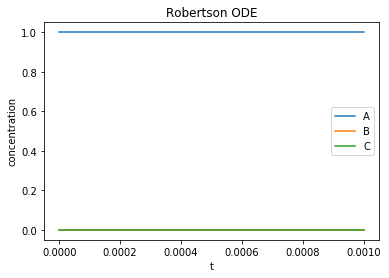

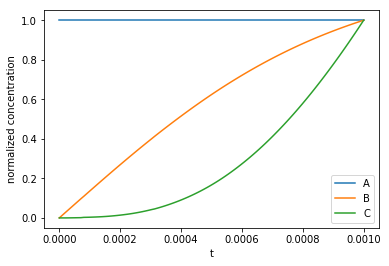

In [18]:
def Robertson(x,t,k1,k2,k3):
    f1 = k1*x[0]
    f2 = k2*x[1]*x[1]
    f3 = k3*x[1]*x[2]
    
    dx = zeros(3)
    dx[0] = -f1 + f3
    dx[1] = f1 - f2 - f3
    dx[2] =  f2
    return dx

k1 = 0.04
k2 = 3e7
k3 = 1e4

t = np.linspace(0,0.001,100)
x0 = np.array([1,0,0]);

x = odeint(Robertson, x0, t, args=(k1,k2,k3));

plt.plot(t,x[:,0],label='A')
plt.plot(t,x[:,1],label='B')
plt.plot(t,x[:,2],label='C')
plt.legend()
plt.xlabel('t')
plt.ylabel('concentration')
plt.title("Robertson ODE")
plt.show()

xmax = x.max(axis=0)

xscaled = x/xmax; 
plt.plot(t,xscaled[:,0],label='A')
plt.plot(t,xscaled[:,1],label='B')
plt.plot(t,xscaled[:,2],label='C')
plt.xlabel('t')
plt.ylabel('normalized concentration')
plt.legend()
plt.show()

8) 

We produce approximations of the concentrations at times $2^{i}, i = -20, ..., 10$ and plot the scaled three concentrations on the same plot using the previous scaled method. We should use a log scale for the time axis. 

At small time($10^{-5}$~$10^{0}$), the normalized concentration of A and C don't change much but that of B goes up initially and goes down later.

At large times($10^2$~$10^3$), the normalized concentration of C goes up to one and that of A and B go down.

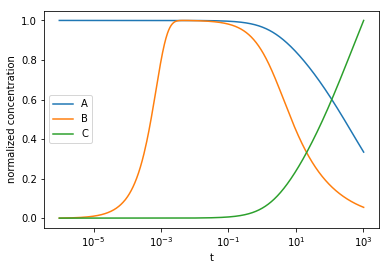

In [19]:
t = 2**np.linspace(-20,10,1000)
x0 = np.array([1,0,0]);
x = odeint(Robertson, x0, t, args=(k1,k2,k3));

xmax = x.max(axis=0)

xscaled = x/xmax; 


plt.semilogx(t,xscaled[:,0],label='A')
plt.semilogx(t,xscaled[:,1],label='B')
plt.semilogx(t,xscaled[:,2],label='C')
plt.xlabel('t')
plt.ylabel('normalized concentration')
plt.legend()
plt.show()

9)

The concentrations are still in a transient state at time t = 1024. We run the calculation to larger times to ascertain the long time behaviour of the system($2^{-20}$~$2^{40}$) and plot the concentration and normalized concentration of three species with respect to time. Concentrations do $A$, $B$ and $C$ limit to 0, 0 and 1, respectively.

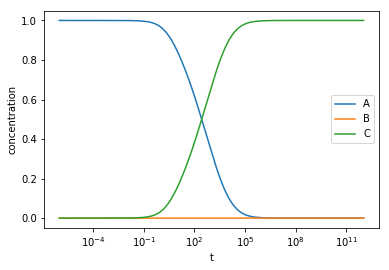

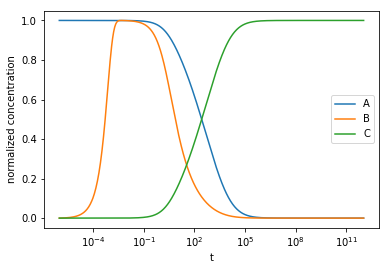

In [20]:
t = 2**np.linspace(-20,40,600)
x0 = np.array([1,0,0]);
x = odeint(Robertson, x0, t, args=(k1,k2,k3));

xmax = x.max(axis=0)

xscaled = x/xmax; 

plt.semilogx(t,x[:,0],label='A')
plt.semilogx(t,x[:,1],label='B')
plt.semilogx(t,x[:,2],label='C')
plt.xlabel('t')
plt.ylabel('concentration')
plt.legend()
plt.show()

plt.semilogx(t,xscaled[:,0],label='A')
plt.semilogx(t,xscaled[:,1],label='B')
plt.semilogx(t,xscaled[:,2],label='C')
plt.xlabel('t')
plt.ylabel('normalized concentration')
plt.legend()
plt.show()

In [21]:
print(x[599,0],x[599,1],x[599,2])

-5.132000221217949e-09 -2.0528000700691953e-14 1.000000005756564
